In [1]:
#importing the libraries
import pandas as pd
import numpy as np

In [2]:
#reading the data
dataset = pd.read_excel("assignment.xlsx")

In [3]:
#checking the head to understand the data
dataset.head()

,Region,Constituency_Type,Position,Candidate,Party,Vote_Share_Percentage,Turnout_Percentage,MARGIN_PERCENT,GRP
0,WEST UTTAR PRADESH,GEN,1,Mahaveer Singh Rana,BSP,31.78,72.91,N,BSP
1,WEST UTTAR PRADESH,GEN,2,Naresh,INC,31.55,72.91,NaN,INC
2,WEST UTTAR PRADESH,GEN,3,Umar Ali Khan,SP,21.42,72.91,NaN,SP
3,WEST UTTAR PRADESH,GEN,4,Ajay Chauhan,BJP,10.68,72.91,NaN,BJP
4,WEST UTTAR PRADESH,GEN,1,Dr. Dharam Singh Saini,BSP,38.65,77.18,NaN,BSP


In [4]:
#identifying the datatypes of the columns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 9 columns):
Region                   4184 non-null object
Constituency_Type        4184 non-null object
Position                 4184 non-null int64
Candidate                4184 non-null object
Party                    4184 non-null object
Vote_Share_Percentage    4184 non-null float64
Turnout_Percentage       4184 non-null float64
MARGIN_PERCENT           1 non-null object
GRP                      4184 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 294.3+ KB


Showing the metadata information of the dataset

In [6]:
# MARGIN_PERCENT consists of all the null values except one
dataset["MARGIN_PERCENT"].value_counts()

N    1
Name: MARGIN_PERCENT, dtype: int64

In [7]:
# we may drop the columsn MARGIN_PERCENT
dataset= dataset.drop("MARGIN_PERCENT", axis = 1)

Drop the column which is not adding value

In [8]:
#segregate the data- Region-wise 
dataset["Region"].value_counts() 

WEST UTTAR PRADESH      1412
PURVANCHAL              1336
MADHYA UTTAR PRADESH    1248
BUNDELKHAND              188
Name: Region, dtype: int64

Showing the total count of candidates for each region

In [10]:
#creating a column for differentiating the data on the basis of Party - SP
dataset["Reg_SP"] = ["SP" if x=='SP' else "Other than SP" for x in dataset["Party"] ]

In [19]:
#checking the head
dataset.head()

,Region,Constituency_Type,Position,Candidate,Party,Vote_Share_Percentage,Turnout_Percentage,GRP,Reg_SP
0,WEST UTTAR PRADESH,GEN,1,Mahaveer Singh Rana,BSP,31.78,72.91,BSP,Other than SP
1,WEST UTTAR PRADESH,GEN,2,Naresh,INC,31.55,72.91,INC,Other than SP
2,WEST UTTAR PRADESH,GEN,3,Umar Ali Khan,SP,21.42,72.91,SP,SP
3,WEST UTTAR PRADESH,GEN,4,Ajay Chauhan,BJP,10.68,72.91,BJP,Other than SP
4,WEST UTTAR PRADESH,GEN,1,Dr. Dharam Singh Saini,BSP,38.65,77.18,BSP,Other than SP


In [20]:
#exploring the region-wise segregation of 'SP' and 'Other than SP' Party
pd.crosstab(dataset["Region"], dataset["Reg_SP"])

Reg_SP,Other than SP,SP
Region,,
BUNDELKHAND,150,38
MADHYA UTTAR PRADESH,974,274
PURVANCHAL,1051,285
WEST UTTAR PRADESH,1122,290


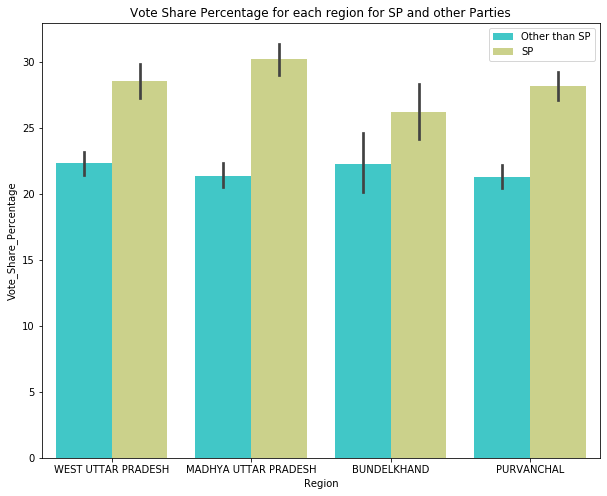

In [31]:
#visualizing the Vote_Share_Percentage for "SP" and "Other than SP" party
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,8))
sns.barplot(x='Region', y='Vote_Share_Percentage', hue='Reg_SP', palette='rainbow',data = dataset)
plt.title('Vote Share Percentage for each region for SP and other Parties')
plt.legend()

From the above graph, we can conlcude that 
For Samajwadi Party(SP), vote share percentage for Madhya Uttar Pradesh is the highest among all the regions, followed by West Uttar Pradesh and Purvanchal while Bundelkhand has the lowest vote share percentage.

In [33]:
#identifying the share of Constituency_Type and Party (SP or other than SP)
pd.crosstab(dataset["Constituency_Type"], dataset["Reg_SP"]) 

Reg_SP,Other than SP,SP
Constituency_Type,,
GEN,2599,701
SC,698,186


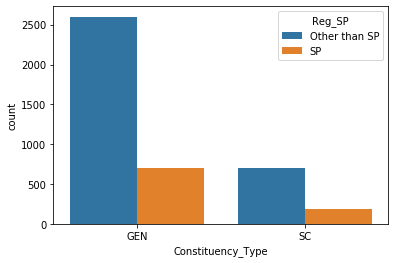

In [34]:
#visualizing the above share using the seaborn library
sns.countplot("Constituency_Type", hue= "Reg_SP", data = dataset)

From the above graph, we can conclude that SP has most of the candidates under "GEN" constituency

In [85]:
A= pd.crosstab(dataset['Party'],dataset['Region'])
A

Region,BUNDELKHAND,MADHYA UTTAR PRADESH,PURVANCHAL,WEST UTTAR PRADESH
Party,,,,
AAAP,0,2,1,1
ABLTC,0,0,1,0
AD,0,2,21,0
ADAL,0,0,11,0
ADS,0,0,2,0
AIMIM,0,6,1,6
AITC,0,0,0,2
Aajad Bharat Party (Democratic),0,1,0,0
Apna Dal United Party,0,0,1,0


In [67]:
#For Bundelkhand
A[A['BUNDELKHAND']==A['BUNDELKHAND'].max()]

Region,BUNDELKHAND,MADHYA UTTAR PRADESH,PURVANCHAL,WEST UTTAR PRADESH
Party,,,,
BJP,46,291,280,324


In [64]:
#For Madhya Uttar Pradesh
A[A['MADHYA UTTAR PRADESH']==A['MADHYA UTTAR PRADESH'].max()]

Region,BUNDELKHAND,MADHYA UTTAR PRADESH,PURVANCHAL,WEST UTTAR PRADESH
Party,,,,
BSP,45,299,321,336


In [68]:
#For Purvanchal
A[A['PURVANCHAL']==A['PURVANCHAL'].max()]

Region,BUNDELKHAND,MADHYA UTTAR PRADESH,PURVANCHAL,WEST UTTAR PRADESH
Party,,,,
BSP,45,299,321,336


In [82]:
#For West Uttar Pradesh
A[A['WEST UTTAR PRADESH']==A['WEST UTTAR PRADESH'].max()]

Region,BUNDELKHAND,MADHYA UTTAR PRADESH,PURVANCHAL,WEST UTTAR PRADESH
Party,,,,
BSP,45,299,321,336


From the above, it can be concluded that BJP has the maximum presence in Bundelkhand region while BSP rules the other three regions in context of maximum hold.

Thank You !!!